In [1]:
# from cpflow import *
# from cpflow.topology import *
# from cpflow.matrix_utils import *
# from cpflow.exact_decompositions import constrained_function
from collections import namedtuple
from jax import random
from mynimize import *

from traps import *
import numpy as np

To intall it run "pip install git+https://github.com/LNoorl/qiskit-terra@d2e0dc1185ccc3b0c9957e3d7d9bc610dede29d4" 
You might also need to install the Rust compiler https://www.rust-lang.org/tools/install .


Experiments to do.
- Reproduce self-instances and random unitaries for cz gates.
- Make the same plots for cp gates
- Now make the same plots for both cp and cz gates with target being the identity gate!

Apparently, the conclusion will be that it is very hard to compile the gate of the same complexity, but probably much easier to compile gates of lower complexity. Would be helpful to extend this more systematically. Is there a phase transition somewhere in learning as a function of ansatz complexity / target complexity ?

- Make experiments with single gate removal. Preliminarly there are no problems.


Talk ideas:
- Mention that num_gates may be a good proxy for complexity https://arxiv.org/abs/2106.05305
- My procedure as a warm-start for ansatz-modifying algorithms?

# Success ratios for 'cz' self-instances

## 2q

In [2]:
%%time

options = ExperimentOptions(
    target_type='self_instance',
    ansatz_type='cz', 
    num_qubits=2, 
    gate_counts = [1, 2], 
    num_targets=3, 
    num_samples=10, 
    keep_history=True)

exp = Experiment(options, 'test_keep')
exp.run()

Gates:   0%|          | 0/2 [00:00<?, ?it/s]

Targets:   0%|          | 0/3 [00:00<?, ?it/s]

Targets:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 28.4 s, sys: 131 ms, total: 28.5 s
Wall time: 28.7 s


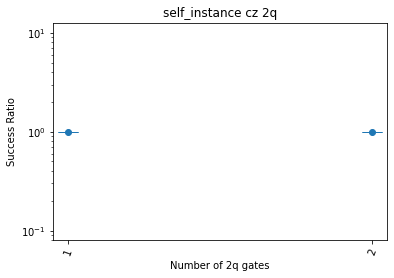

In [3]:
exp.plot_success_ratios()

In [2]:
target_type = 'self_instance'
ansatz_type = 'cz'
num_qubits = 2
gate_counts = range(4)
num_targets = 2
num_samples = 100


chart_success_ratio(target_type, ansatz_type, num_qubits, gate_counts, num_targets, num_samples)

{0: [DeviceArray(1., dtype=float32), DeviceArray(1., dtype=float32)],
 1: [DeviceArray(1., dtype=float32), DeviceArray(1., dtype=float32)],
 2: [DeviceArray(1., dtype=float32), DeviceArray(1., dtype=float32)],
 3: [DeviceArray(1., dtype=float32), DeviceArray(1., dtype=float32)]}

In [4]:
r = Results.load('results/self_instance_cz_2q/depth_0_target_0')

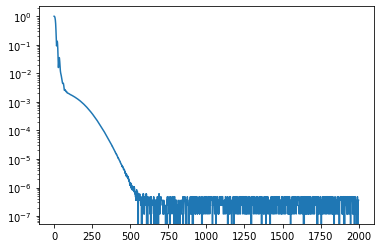

In [7]:
r.all_results[26].plot_loss_history()

In [22]:
def get_losses(path, gate_counts, num_targets):
    all_losses = {}
    for gc in gate_counts:
        losses_at_gc = {}
        for n in range(num_targets):
            results = Results.load(path+f'/depth_{gc}_target_{n}')
            losses = results.all_best_losses
            losses_at_gc[str(n)] = losses
        all_losses[str(gc)] = losses_at_gc
    
    return all_losses

def get_success_ratios(path, gate_counts, num_targets)
    all_losses = get_losses(path, gate_counts, num_targets)
    success_rats = success_ratio_from_losses()

In [23]:
get_losses('results/self_instance_cz_2q', range(4), 2)

{'0': {'0': [array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-4.7683716e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(0., dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(0., dtype=float32),
   array(-2.3841858e-07, dtype=float32),
   array(-4.7683716e-07, dtype

In [3]:
chart_success_ratio('self_instance', 'cz', 3, [6, 8, 12], 1, 100)

{6: [DeviceArray(0.06, dtype=float32)],
 8: [DeviceArray(0.02, dtype=float32)],
 12: [DeviceArray(0., dtype=float32)]}

In [9]:
chart_success_ratio('self_instance', 'cp', 3, [6, 8, 12], 1, 100)

{6: [DeviceArray(0.4, dtype=float32)],
 8: [DeviceArray(0.01, dtype=float32)],
 12: [DeviceArray(1., dtype=float32)]}

In [2]:
chart_success_ratio('random_unitary', 'cz', 3, [6, 8, 12], 1, 100)

{6: [DeviceArray(0.06, dtype=float32)],
 8: [DeviceArray(0.02, dtype=float32)],
 12: [DeviceArray(0.02, dtype=float32)]}

In [4]:
chart_success_ratio('fixed_unitary', 'cz', 3, [6, 8, 12], 1, 100, fixed_unitary=jnp.identity(2**3))

{6: [DeviceArray(0.63, dtype=float32)],
 8: [DeviceArray(1., dtype=float32)],
 12: [DeviceArray(0.98, dtype=float32)]}

In [5]:
chart_success_ratio('fixed_unitary', 'cp', 3, [6, 8, 12], 1, 100, fixed_unitary=jnp.identity(2**3))

{6: [DeviceArray(0.99, dtype=float32)],
 8: [DeviceArray(1., dtype=float32)],
 12: [DeviceArray(1., dtype=float32)]}

In [4]:
success_ratio('self_instance', 2, 2, 100, 0, 1e-4)

DeviceArray(0.98, dtype=float32)

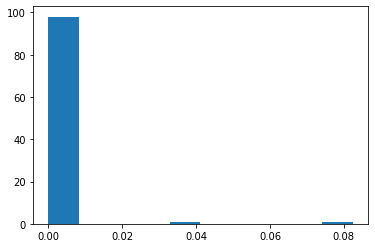

In [12]:
results = Results.load('results/fixed_unitary_cz_3q_12d_0')
plt.hist(np.array(results.all_best_losses));

In [8]:
fr = [r for r in results.all_results if r.best_loss > 1e-4]

In [10]:
OptOptions()

OptOptions(learning_rate=0.01, num_iterations=100, random_seed=0, regularization_func=None, keep_history=True)

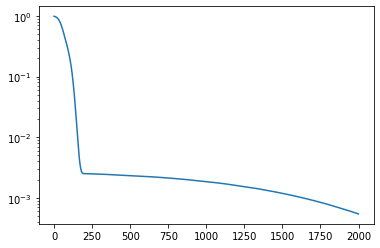

In [9]:
fr[0].plot_loss_history()

In [23]:
def remove_gate(circuit, n):

    gate_num = 0    
    for i, op in enumerate(circuit.data):        
        if op[0].name in ['rx', 'ry', 'rz']:
            if gate_num == n:
                gate_to_remove = i
                break
            else:
                gate_num += 1
    qc = circuit.copy()            
    del qc.data[gate_to_remove]
    
    return qc

In [132]:
num_qubits = 4
depth = 30
n_gate = 50

anz = Ansatz(num_qubits, 'cz', fill_layers(connected_layer(num_qubits), depth))

angles_target = random.uniform(random.PRNGKey(1), (anz.num_angles, ), minval=0, maxval=2*jnp.pi)
u_target = anz.unitary(angles_target)

u_missing_gate = constrained_function(anz.unitary, [0], [n_gate])
angles_missing_gate_initial = jnp.delete(angles_target, n_gate)

A = namedtuple('Angles', ['angles'])

loss = lambda a: cost_HST(u_missing_gate(a.angles), u_target)
result = mynimize(loss, [A(angles_missing_gate_initial)], OptOptions(num_iterations=2000))

In [133]:
result

OptMultiResult(best_loss -9.5367431640625e-07, success_ratio 0.0, num_samples 1)

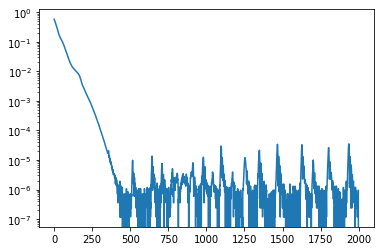

In [127]:
result.best_result.plot_loss_history()

In [107]:
cost_HST(anz.unitary(angles_target.at[n_gate].set(0)), u_missing_gate(angles_missing_gate_initial))

DeviceArray(-4.7683716e-07, dtype=float32)

In [108]:
cost_HST(u_target, u_missing_gate(angles_missing_gate_initial))

DeviceArray(0.5684607, dtype=float32)

In [75]:
num_qubits = 3
depth = 4
n_gate = 0

anz = Ansatz(num_qubits, 'cz', fill_layers(connected_layer(num_qubits), depth))

pqc = anz.circuit()
pqc_missing_gate = remove_gate(pqc, n_gate)

angles_target = random.uniform(random.PRNGKey(0), (anz.num_angles, ), minval=0, maxval=2*jnp.pi)
angles_target = np.array(angles_target)

pqc_dict_target = {p:a for p, a in zip(pqc.parameters.data, angles_target)}
pqc_missing_gate_dict_initial = {key:value for key, value in pqc_dict_target.items() if key in pqc_missing_gate.parameters.data}
# angles_target = np.array(angles_target)

In [83]:
pqc_missing_gate.parameters

ParameterView([Parameter(a_{0}), Parameter(a_{10}), Parameter(a_{11}), Parameter(a_{12}), Parameter(a_{13}), Parameter(a_{14}), Parameter(a_{15}), Parameter(a_{16}), Parameter(a_{17}), Parameter(a_{18}), Parameter(a_{19}), Parameter(a_{1}), Parameter(a_{20}), Parameter(a_{21}), Parameter(a_{22}), Parameter(a_{23}), Parameter(a_{24}), Parameter(a_{25}), Parameter(a_{26}), Parameter(a_{27}), Parameter(a_{28}), Parameter(a_{29}), Parameter(a_{2}), Parameter(a_{30}), Parameter(a_{31}), Parameter(a_{32}), Parameter(a_{3}), Parameter(a_{4}), Parameter(a_{5}), Parameter(a_{6}), Parameter(a_{7}), Parameter(a_{8}), Parameter(a_{9})])

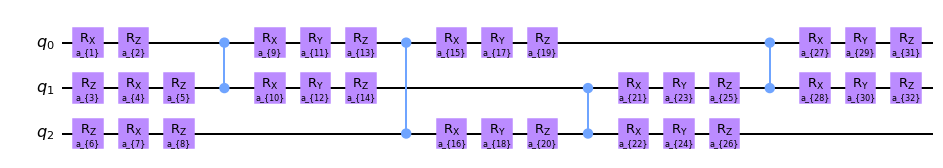

In [82]:
pqc_missing_gate.draw(output='mpl')

In [80]:
len(pqc_missing_gate.parameters)

33

In [81]:
len(pqc.parameters)

33

In [79]:
len(pqc_dict_target)

33

In [78]:
len(pqc_missing_gate_dict_initial)

33

In [76]:
pqc_missing_gate.assign_parameters(pqc_missing_gate_dict_initial)

KeyError: 140262195370784

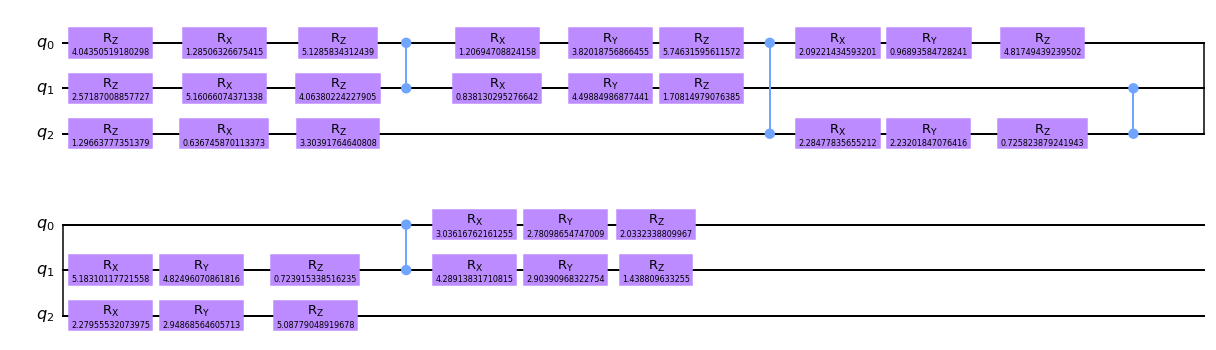

In [73]:
pqc.assign_parameters(pqc_dict_target).draw(output='mpl')

In [68]:
pqc_dict_target.data

[Parameter(a_{0}),
 Parameter(a_{10}),
 Parameter(a_{11}),
 Parameter(a_{12}),
 Parameter(a_{13}),
 Parameter(a_{14}),
 Parameter(a_{15}),
 Parameter(a_{16}),
 Parameter(a_{17}),
 Parameter(a_{18}),
 Parameter(a_{19}),
 Parameter(a_{1}),
 Parameter(a_{20}),
 Parameter(a_{21}),
 Parameter(a_{22}),
 Parameter(a_{23}),
 Parameter(a_{24}),
 Parameter(a_{25}),
 Parameter(a_{26}),
 Parameter(a_{27}),
 Parameter(a_{28}),
 Parameter(a_{29}),
 Parameter(a_{2}),
 Parameter(a_{30}),
 Parameter(a_{31}),
 Parameter(a_{32}),
 Parameter(a_{3}),
 Parameter(a_{4}),
 Parameter(a_{5}),
 Parameter(a_{6}),
 Parameter(a_{7}),
 Parameter(a_{8}),
 Parameter(a_{9})]

In [56]:
pd = {p: a for p, a in zip(anz.circuit().parameters, angles_target)}

In [62]:
anz.circuit().parameters[0]

Parameter(a_{0})

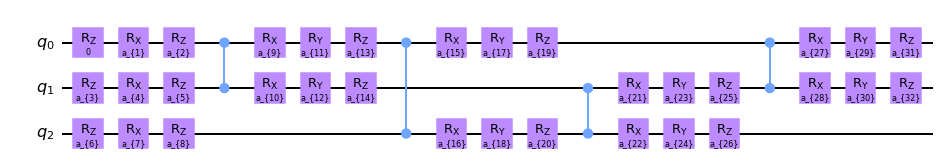

In [65]:
qc = anz.circuit()
qc.assign_parameters({qc.parameters[0]:0}).draw(output='mpl')

In [38]:
n_gate = 0

circuit_target = anz.circuit().bind_parameters(angles_target)
circuit_missing_gate = remove_gate(anz.circuit(), n_gate).bind_parameters(angles_target)
# circuit_target.draw(output='mpl')

KeyError: 140262204884976

In [ ]:
anz.circuit().bind_parameters()

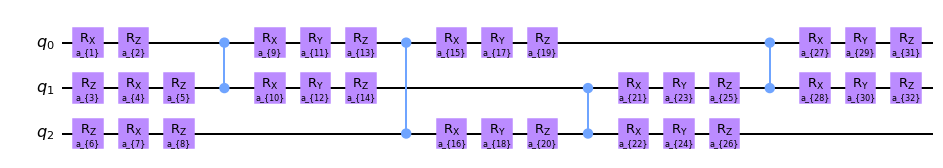

In [35]:
remove_gate(anz.circuit(), 0).draw(output='mpl')

In [ ]:
def delete_gate(circuit, n):
    qc = circuit.copy()
    params=

In [29]:
anz.circuit().parameters

ParameterView([Parameter(a_{0}), Parameter(a_{10}), Parameter(a_{11}), Parameter(a_{12}), Parameter(a_{13}), Parameter(a_{14}), Parameter(a_{15}), Parameter(a_{16}), Parameter(a_{17}), Parameter(a_{18}), Parameter(a_{19}), Parameter(a_{1}), Parameter(a_{20}), Parameter(a_{21}), Parameter(a_{22}), Parameter(a_{23}), Parameter(a_{24}), Parameter(a_{25}), Parameter(a_{26}), Parameter(a_{27}), Parameter(a_{28}), Parameter(a_{29}), Parameter(a_{2}), Parameter(a_{30}), Parameter(a_{31}), Parameter(a_{32}), Parameter(a_{3}), Parameter(a_{4}), Parameter(a_{5}), Parameter(a_{6}), Parameter(a_{7}), Parameter(a_{8}), Parameter(a_{9})])

In [24]:
from scipy.optimize import minimize

In [ ]:
def loss()